In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set()

## [why seaborn is not adding formatting even after importing?](https://stackoverflow.com/questions/46783913/seaborn-is-not-setting-its-default-color-palette-on-import)

> The default style is no longer applied when seaborn is imported. It is now necessary to explicitly call set() or one or more of set_style(), set_context(), and set_palette(). Correspondingly, the seaborn.apionly module has been deprecated.

> you need to call `seaborn.set()` to get the default style of seaborn or use any other of the [seaborn styles](https://seaborn.pydata.org/tutorial/aesthetics.html) and .



### You can also use seaborn styles with matplotlib and not using seaborn at all. E.g.

>import matplotlib.pyplot as plt  
plt.style.use("seaborn-darkgrid")

or any other style from the [style sheet reference](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)

In [3]:
wine_df = pd.read_csv('winequality_edited.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,Moderately High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,Low


In [4]:
wine_df.groupby('color')['quality'].mean()

color
Red      5.636023
White    5.877909
Name: quality, dtype: float64

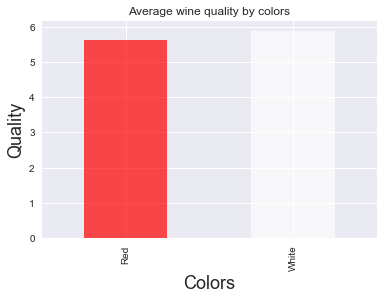

In [5]:
col = ['red', 'white']
color_mean = wine_df.groupby('color')['quality'].mean()
color_mean.plot(kind='bar', title = 'Average wine quality by colors', color=col, alpha = .7);
plt.xlabel('Colors', fontsize = 18);
plt.ylabel('Quality', fontsize = 18);

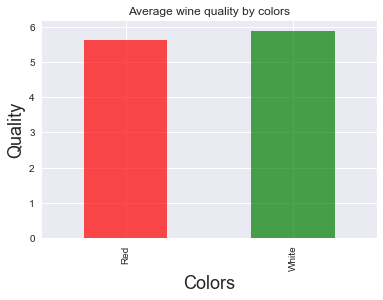

In [6]:
col = ['red', 'green']
color_mean = wine_df.groupby('color')['quality'].mean()
color_mean.plot(kind='bar', title = 'Average wine quality by colors', color=col, alpha = .7);
plt.xlabel('Colors', fontsize = 18);
plt.ylabel('Quality', fontsize = 18);

[Counting number of occurrences on Pandas DataFrame columns](https://www.codementor.io/tips/3847022612/counting-number-of-occurrences-on-pandas-dataframe-columns)

   
```
 	ID	Do you sleep?	Are you hungry?
0	1	Yes	No
1	2	Yes	Maybe
2	3	No	Yes
3	4	Yes	No
4	5	No	Yes
5	6	No	Maybe
6	7	Yes	Yes
7	8	No	No
8	9	Yes	Maybe
9	10	Yes	Yes
10	11	Maybe	Maybe
11	12	Maybe	Yes

```

And you want to count the number of answers for each question. This can be obtained through two steps:


1. We first [melt](https://www.codementor.io/tips/3847022612/counting-number-of-occurrences-on-pandas-dataframe-columns) the data:

```
# We don't need the ID's, so we skip that collumn.
melted_data = pd.melt(data, value_vars=['Do you sleep?', 'Are you hungry?'], 
                      var_name='question', value_name='answer')
```

2. Then we 'groupby' it:

```
melted_data.groupby(by=['question', 'answer'])['answer'].count()
```

And we get:

```
question         answer
Are you hungry?  Maybe     4
                 No        3
                 Yes       5
Do you sleep?    Maybe     2
                 No        4
                 Yes       6
Name: answer, dtype: int64
```

In [7]:
counts = wine_df.groupby(['quality', 'color']).count()
counts   # since its columns Value for all coulmns will be same so just taking arbitrary col : say pH

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       Red               10                10           10              10   
        White             20                20           20              20   
4       Red               53                53           53              53   
        White            163               163          163             163   
5       Red              681               681          681             681   
        White           1457              1457         1457            1457   
6       Red              638               638          638             638   
        White           2198              2198         2198            2198   
7       Red              199               199          199             199   
        White            880               880          880             880   
8       Red               18                18           18              18   
        White            175               175          175             175   
9       White              5                 5            5               5   

               chlorides  free sulfur dioxide  total sulfur dioxide  density  \
quality color                                                                  
3       Red           10                   10                    10       10   
        White         20                   20                    20       20   
4       Red           53                   53                    53       53   
        White        163                  163                   163      163   
5       Red          681                  681                   681      681   
        White       1457                 1457                  1457     1457   
6       Red          638                  638                   638      638   
        White       2198                 2198                  2198     2198   
7       Red          199                  199                   199      199   
        White        880                  880                   880      880   
8       Red           18                   18                    18       18   
        White        175                  175                   175      175   
9       White          5                    5                     5        5   

                 pH  sulphates  alcohol  acidity_levels  
quality color                                            
3       Red      10         10       10              10  
        White    20         20       20              20  
4       Red      53         53       53              53  
        White   163        163      163             163  
5       Red     681        681      681             681  
        White  1457       1457     1457            1457  
6       Red     638        638      638             638  
        White  2198       2198     2198            2197  
7       Red     199        199      199             199  
        White   880        880      880             880  
8       Red      18         18       18              18  
        White   175        175      175             175  
9       White     5          5        5               5

In [8]:
counts = wine_df.groupby(['quality', 'color']).count()['pH']
print(counts)

quality  color
3        Red        10
         White      20
4        Red        53
         White     163
5        Red       681
         White    1457
6        Red       638
         White    2198
7        Red       199
         White     880
8        Red        18
         White     175
9        White       5
Name: pH, dtype: int64


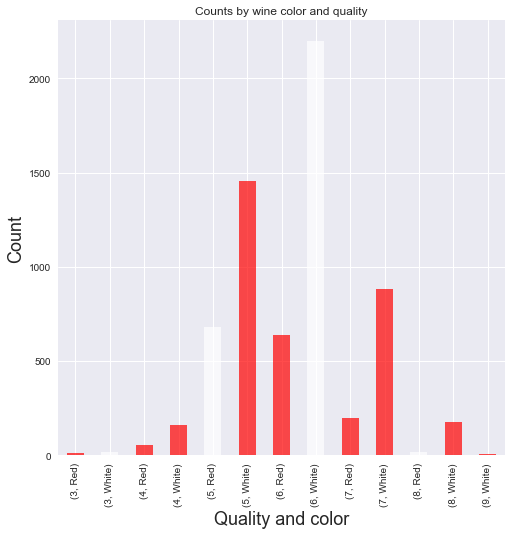

In [9]:
colors = ['red', 'white']
counts.plot(kind = 'bar', title = 'Counts by wine color and quality', color = colors, alpha = 0.7, figsize = (8,8));
plt.xlabel('Quality and color', fontsize = 18);
plt.ylabel('Count', fontsize=18);

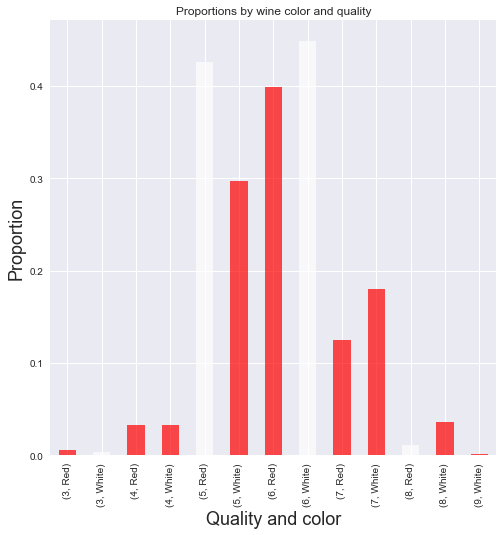

In [10]:
total = wine_df.groupby('color').count()['pH']
proportions = counts/total
proportions.plot(kind = 'bar', title = 'Proportions by wine color and quality', color = colors, alpha = 0.7, figsize = (8,8));
plt.xlabel('Quality and color', fontsize = 18);
plt.ylabel('Proportion', fontsize=18);

Color mapping iks not perfect in pandas plot so better to use matplotlib.